In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/Housing Price Prediction'
os.chdir(base_path)

In [ ]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Store label encoders for each column

for column in train.columns:
    if not pd.api.types.is_numeric_dtype(train[column]):
        le = LabelEncoder()
        train[column] = le.fit_transform(train[column].astype(str))
        label_encoders[column] = le

In [ ]:
train.fillna(0, inplace=True)
train = train.astype(int)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
FireplaceQu    -0.459605
GarageFinish   -0.549247
KitchenQual    -0.589189
BsmtQual       -0.620886
ExterQual      -0.636884
Name: SalePrice, Length: 81, dtype: float64


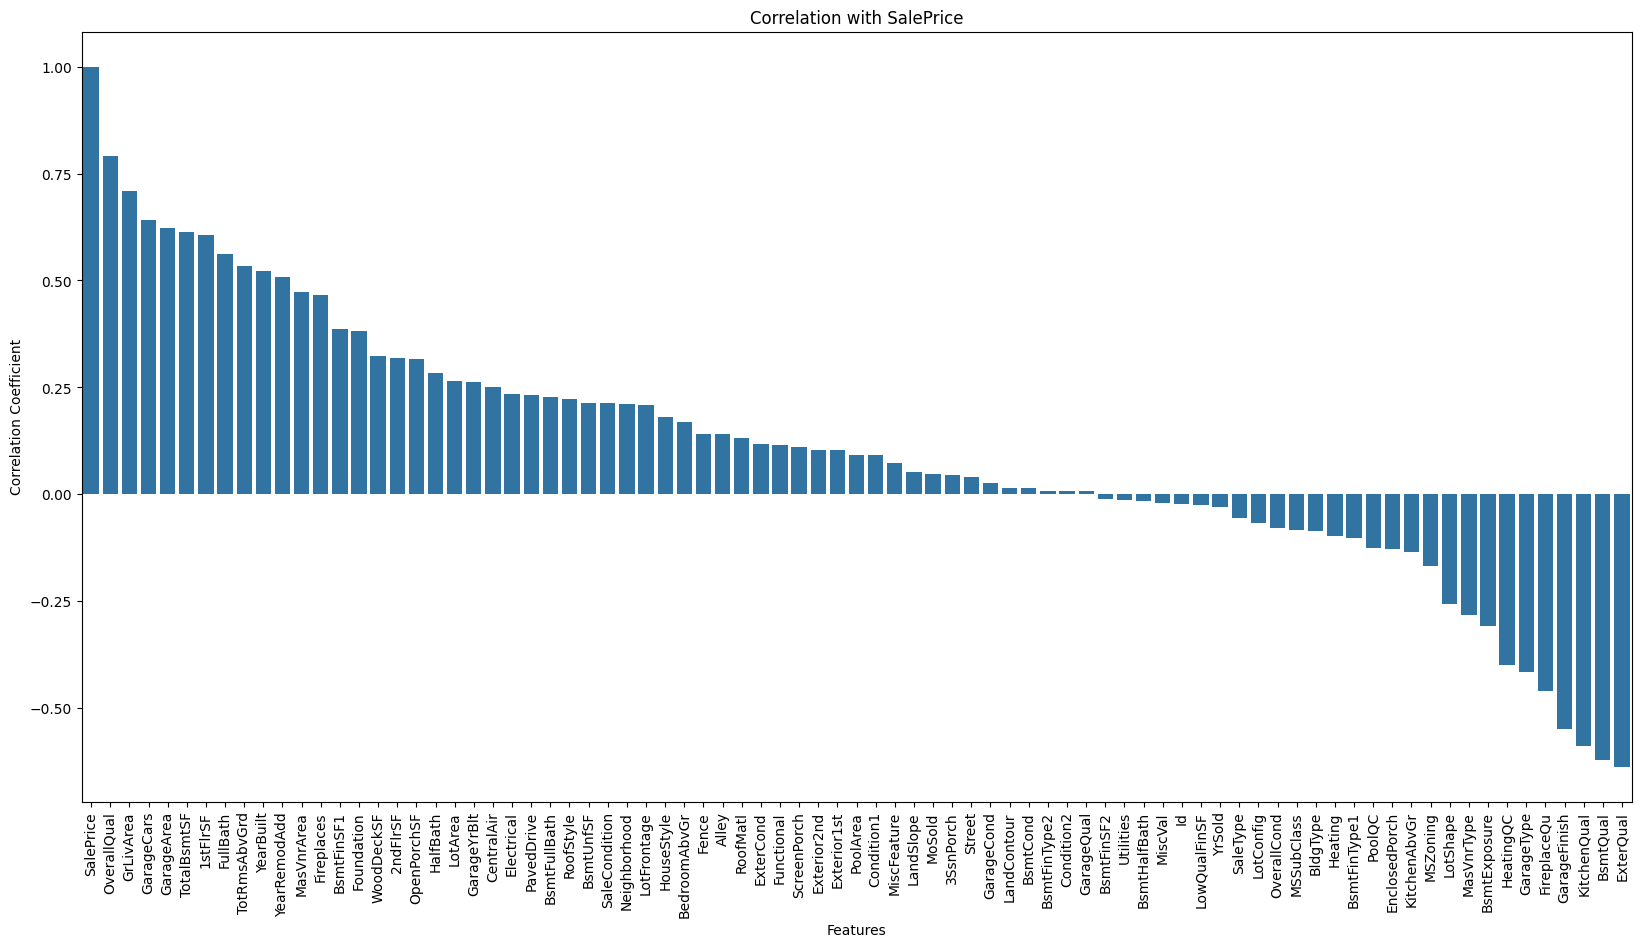

In [ ]:
numeric_features = train.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation of each numerical feature with 'SalePrice'
correlation_with_saleprice = numeric_features.corr()['SalePrice'].sort_values(ascending=False)

# Print the correlation coefficients
print(correlation_with_saleprice)

# Visualize the correlation with a bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x=correlation_with_saleprice.index, y=correlation_with_saleprice.values)
plt.xticks(rotation=90)
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [ ]:
X = train.drop('SalePrice', axis = 1)
Y = train['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear.predict(X_test)

r_squared = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

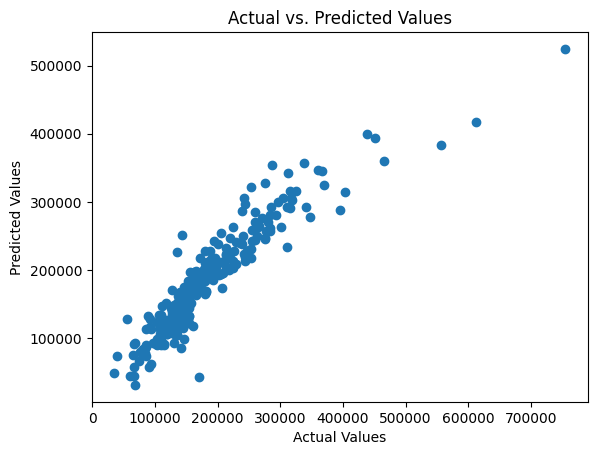

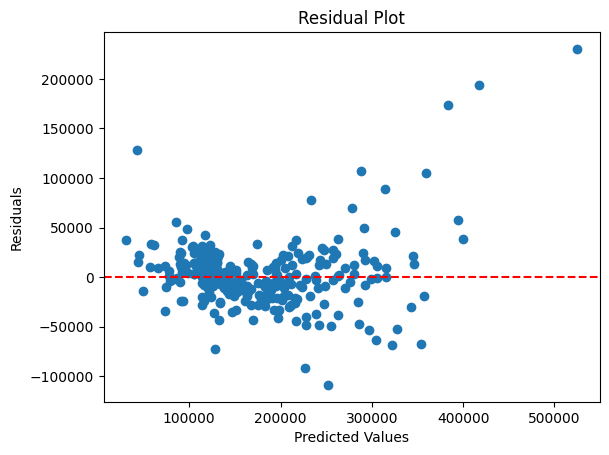

R-squared: 0.8498218647763067
Mean Absolute Error: 21275.04618264004
Mean Squared Error: 1151915286.352786
Root Mean Squared Error: 33939.87752412766


In [ ]:
# Plot predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Create a residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title("Residual Plot")
plt.show()

# Print evaluation metrics
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

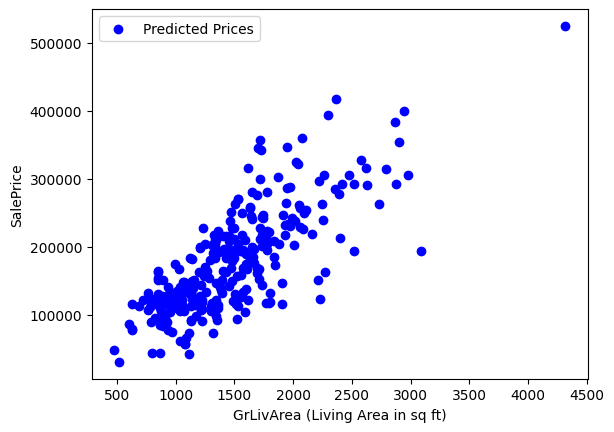

In [ ]:
plt.scatter(X_test['GrLivArea'], y_pred, color='blue', label='Predicted Prices')
plt.xlabel('GrLivArea (Living Area in sq ft)')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

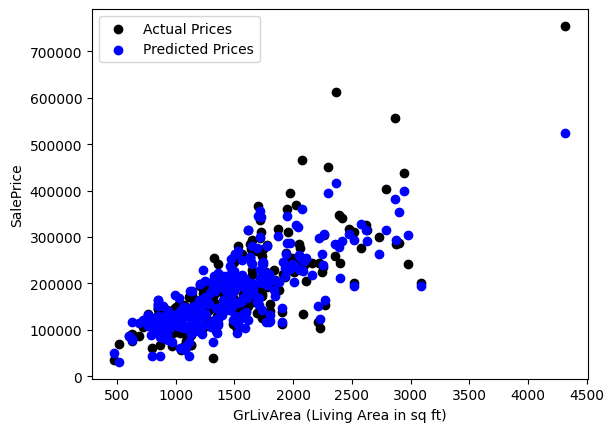

In [ ]:
plt.scatter(X_test['GrLivArea'], y_test, color='black', label='Actual Prices')
plt.scatter(X_test['GrLivArea'], y_pred, color='blue', label='Predicted Prices')
plt.xlabel('GrLivArea (Living Area in sq ft)')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

# Feature Selection (RFE)

In [ ]:
rfe = RFE(linear, n_features_to_select = 30)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]

In [ ]:
selected_features

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope',
       'Condition2', 'BldgType', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageCond', 'PoolQC'],
      dtype='object')

In [ ]:
# Re-split the data
X = train[selected_features]
Y = train['SalePrice']

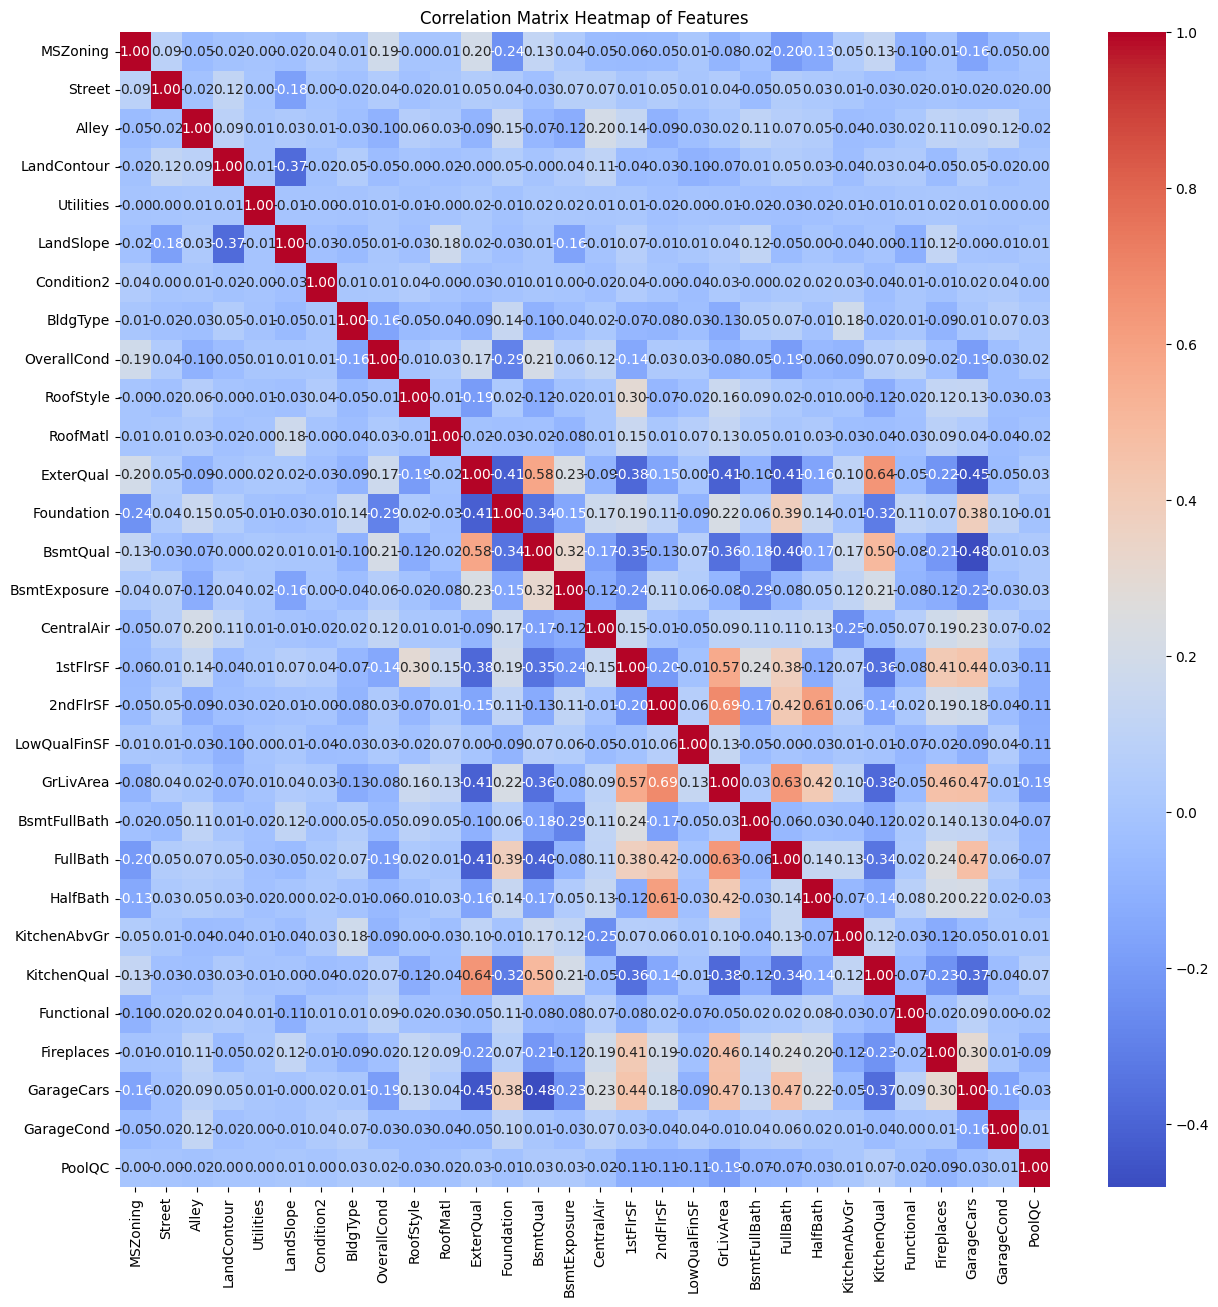

In [ ]:
# prompt: write a code for making a heatmap for the X data with the Y

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and Y are defined as in your previous code
# X = train.drop('SalePrice', axis = 1)
# Y = train['SalePrice']

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Features')
plt.show()

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
linear2 = LinearRegression()

linear2.fit(X_train2, y_train2)

LinearRegression()

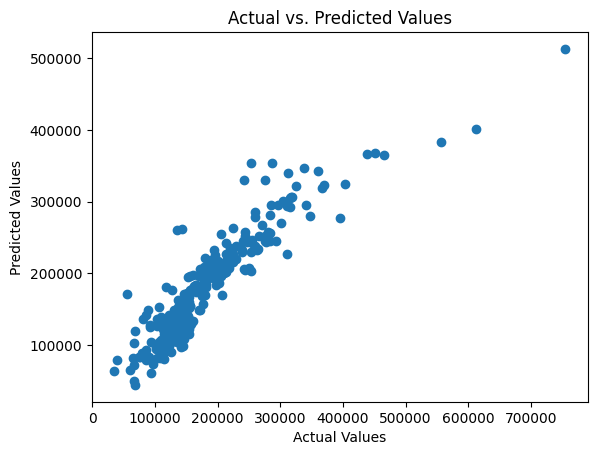

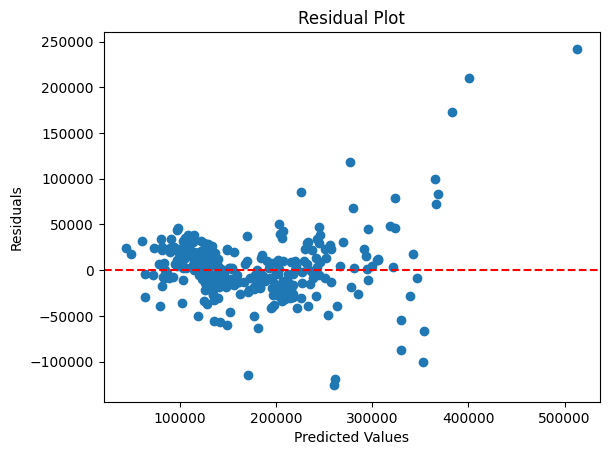

R-squared: 0.8247932315690412
Mean Absolute Error: 23543.65878629816
Mean Squared Error: 1343893067.5725496
Root Mean Squared Error: 36659.147120092


In [ ]:
y_pred2 = linear2.predict(X_test2)

# Calculate R-squared
r_squared2 = r2_score(y_test2, y_pred2)

# Calculate mean absolute error
mae2 = mean_absolute_error(y_test2, y_pred2)

# Calculate mean squared error
mse2 = mean_squared_error(y_test2, y_pred2)

# Calculate root mean squared error
rmse2 = np.sqrt(mse2)

# Plot predicted vs. actual values
plt.scatter(y_test2, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Create a residual plot
residuals2 = y_test2 - y_pred2
plt.scatter(y_pred2, residuals2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title("Residual Plot")
plt.show()

# Print evaluation metrics
print("R-squared:", r_squared2)
print("Mean Absolute Error:", mae2)
print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse2)

# Lasso Regression

In [ ]:
X.columns

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope',
       'Condition2', 'BldgType', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageCond', 'PoolQC'],
      dtype='object')

In [ ]:
desired_alpha = 0.1
model = Lasso(alpha = desired_alpha)
model.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred = model.predict(X_test2)

# Evaluate the model
mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients of the selected features (non-zero coefficients)
coefficients = pd.DataFrame({'Feature': X_test2.columns, 'Coefficient': model.coef_})
selected_features = coefficients[coefficients['Coefficient'] != 0]
print("Selected Features:")
print(selected_features)

Mean Squared Error: 1343893067.5725496
R-squared: 0.8247932315690412
Selected Features:
         Feature   Coefficient
0       MSZoning  -3186.068963
1         Street  15152.040251
2          Alley   5865.392766
3    LandContour   4424.019465
4      Utilities -24721.920701
5      LandSlope  13318.385607
6     Condition2  -6429.487828
7       BldgType  -3534.043006
8    OverallCond   4809.025585
9      RoofStyle   4485.300544
10      RoofMatl   4639.105004
11     ExterQual -13421.538939
12    Foundation   3984.157423
13      BsmtQual -13815.521160
14  BsmtExposure  -3641.830426
15    CentralAir  11212.881474
16      1stFlrSF     59.352723
17      2ndFlrSF     39.699835
18  LowQualFinSF      2.795027
19     GrLivArea      5.220062
20  BsmtFullBath  11122.478144
21      FullBath   9898.769128
22      HalfBath   4279.545216
23  KitchenAbvGr -25295.065770
24   KitchenQual -12241.448516
25    Functional   6406.689065
26    Fireplaces   8462.338575
27    GarageCars  17464.446317
28    GarageC

In [ ]:
X = train[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
Y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
Assignment_model = LinearRegression()
Assignment_model.fit(X_train, y_train)

LinearRegression()

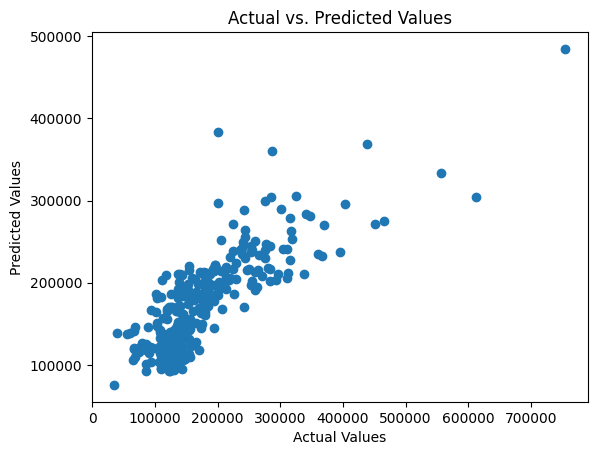

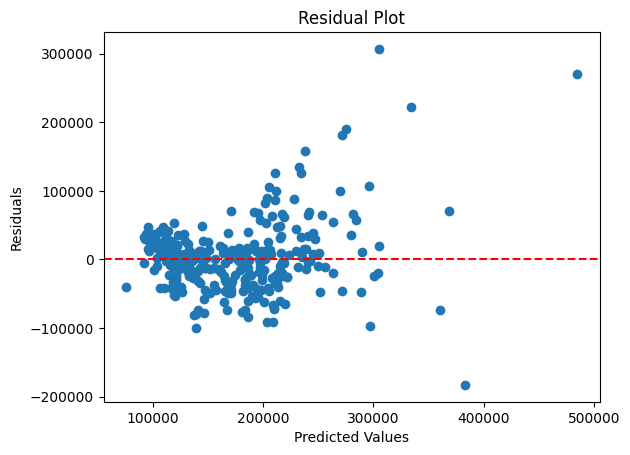

R-squared: 0.6341189942328371
Mean Absolute Error: 35788.061292436294
Mean Squared Error: 2806426667.247853
Root Mean Squared Error: 52975.71771338122


In [ ]:
y_pred2 = Assignment_model.predict(X_test)

# Calculate R-squared
r_squared2 = r2_score(y_test2, y_pred2)

# Calculate mean absolute error
mae2 = mean_absolute_error(y_test2, y_pred2)

# Calculate mean squared error
mse2 = mean_squared_error(y_test2, y_pred2)

# Calculate root mean squared error
rmse2 = np.sqrt(mse2)

# Plot predicted vs. actual values
plt.scatter(y_test2, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Create a residual plot
residuals2 = y_test2 - y_pred2
plt.scatter(y_pred2, residuals2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title("Residual Plot")
plt.show()

# Print evaluation metrics
print("R-squared:", r_squared2)
print("Mean Absolute Error:", mae2)
print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse2)